In [25]:
import glob
import sys

import numpy as np
import pandas as pd
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager

from impedance.models.circuits import CustomCircuit
from impedance.visualization import plot_nyquist, plot_bode, plot_residuals
from impedance import preprocessing
from impedance.models.circuits.elements import G

sys.path.insert(0, '..')
import analyze_comsol as an_com
import ImpedanceCorrection as ic

%reload_ext autoreload
%autoreload 2

### Read in data

In [40]:
def read_EIS_data(direc, f_name, z_format=preprocessing.readZPlot):
    f, Z = z_format(direc + f_name)
    # enforce frequencies from high to low
    Z = Z[np.argsort(f)[::-1]]
    f = f[np.argsort(f)[::-1]]

#     f, Z = preprocessing.ignoreBelowX(f, Z)
    return f, Z

In [29]:
data_dir = '..\EIS Data'
file_str1 = r'\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par'
file_str10 = r'\LSC_DPB1_FRXAS_700C_10%_EIS_OCV_after.par'
file_str100 = r'\LSC_DPB1_FRXAS_700C_100%_EIS_OCV_before2.par'

f_1, Z_1 = read_EIS_data(data_dir, file_str1, z_format=preprocessing.readVersaStudio)
f_10, Z_10 = read_EIS_data(data_dir, file_str10, z_format=preprocessing.readVersaStudio)
f_100, Z_100 = read_EIS_data(data_dir, file_str100, z_format=preprocessing.readVersaStudio)

print(f_1[19], f_1[-1])
print(f_10[20], f_10[-1])
print(f_100[19], f_100[-1])

# fname_w_Zg = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_Zg_3.svg'
# fname_w_par = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_parallel_2.svg'

fs_list = [f_1, f_10, f_100]
Zs_list = [Z_1, Z_10, Z_100]

FileNotFoundError: [Errno 2] No such file or directory: '\\LSC_DPB1_FRXAS_700C_1%_EIS_OCV_before2.par'

In [5]:
data_dir = '..\EIS Data'
file_str1 = data_dir + '\NoHoleAl2O3_8h_1%2_EIS-2.z'
file_str10 = data_dir + '\NoHoleAl2O3_8h_10%_EIS-2.z'
file_str100 = data_dir + '\NoHoleAl2O3_8h_100%_EIS-2.z'

f_1nh, Z_1 = preprocessing.readVersaStudio(file_str1)
f_1, Z_1 = preprocessing.ignoreBelowX(f_1, Z_1)

f_10, Z_10 = preprocessing.readVersaStudio(file_str10)
f_10, Z_10 = preprocessing.ignoreBelowX(f_10, Z_10)

f_100, Z_100 = preprocessing.readVersaStudio(file_str100)
f_100, Z_100 = preprocessing.ignoreBelowX(f_100, Z_100)
print(f_1[19], f_1[-1])
print(f_10[20], f_10[-1])
print(f_100[19], f_100[-1])

# fname_w_Zg = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_Zg_3.svg'
# fname_w_par = r'C:\\Users\\shadd\\OneDrive\\Documents\\Python\\Xray-project\\fr_XAS\\frXAS Paper Figures\\Plots\\EIS\\NoHF_EIS_with_parallel_2.svg'

fs_list = [f_1, f_10, f_100]
Zs_list = [Z_1, Z_10, Z_100]

464.1589 0.02154435
794.3282 0.007943282
359.3814 0.1


More than one peak detected. Returning lowest-frequency values.
More than one peak detected. Returning lowest-frequency values.


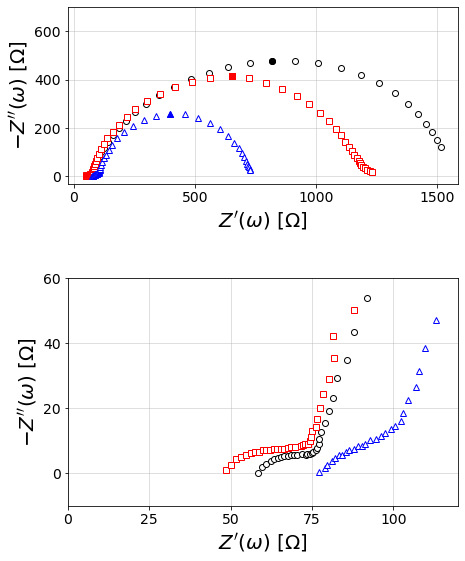

In [26]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    f_peak, Z_peak = ic.find_peak_f_Z(f, Z)
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')
    plot_nyquist(axes[1], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

### Read in 2D simulations

In [29]:
file_dir = r"A:\BrianGerwe\Research\COMSOL\PatternedFilm_Potentiodynamic\2D\Table Exports\EIS Tables\\"

Gg = r'G-2_14'
f = r'Measured'

all_files = an_com.get_all_files(file_dir, Gg, f)
all_files.sort(key=an_com.sort_by_pO2)
all_files

['A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\2D\\Table Exports\\EIS Tables\\G-2_14_f-MeasuredEIS_MB_pO2-0_01.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\2D\\Table Exports\\EIS Tables\\G-2_14_f-MeasuredEIS_MB_pO2-0_1.csv',
 'A:\\BrianGerwe\\Research\\COMSOL\\PatternedFilm_Potentiodynamic\\2D\\Table Exports\\EIS Tables\\G-2_14_f-MeasuredEIS_MB_pO2-1.csv']

Filtered 0 data points with positive Im[Z]
(67.98450853054945-0.5336962862305097j) 0.129155
Filtered 0 data points with positive Im[Z]
(68.19162966400076-0.679250882207783j) 0.3162278
Filtered 0 data points with positive Im[Z]
(69.15029350383435-1.4521885083563664j) 1.6681009999999998


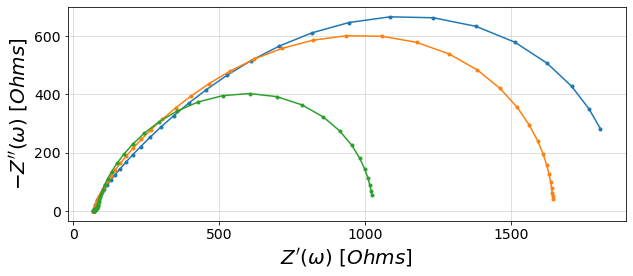

In [30]:
 _, ax = plt.subplots(figsize=(10,7))
fs_2D, Zgs_2D = [], []

Z_key = 'dimensional impedance from MC gate, scaled (m/A)'
#         'dimensional impedance from LT edge (m/A)'
for file in all_files:
    dum = pd.read_csv(file, skiprows=4)
    f, Z_lt = an_com.extract_Zdim(dum, Z_key=Z_key, ignore_posZ=False)
    print(Z_lt[-1], f[np.argmin(Z_lt.imag)])
    Zgs_2D.append(Z_lt)
    fs_2D.append(f)
    plot_nyquist(ax, Z_lt)

plt.show()

### Look at predictions compared to data

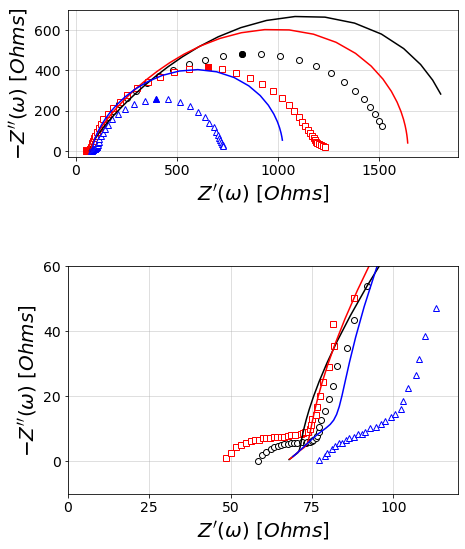

In [31]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


for i, (f, Z) in enumerate(zip(fs_2D, Zgs_2D)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt='-')
    plot_nyquist(axes[1], Z, c=colors[i], fmt='-')

axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

Estimate ohmic resistance from electrolyte, then subtract from all measurements.

In [32]:
sig_i_lt = 0.0544
a = .1095
l_lt = 0.2
R_ohm_est = 1 / sig_i_lt * l_lt /a
R_ohm_est

33.57507386516251

In [33]:
for i, (Zs, Zgs) in enumerate(zip(Zs_list, Zgs_2D)):
    Zs_list[i] = Zs - R_ohm_est
    Zgs_2D[i] = Zgs - R_ohm_est

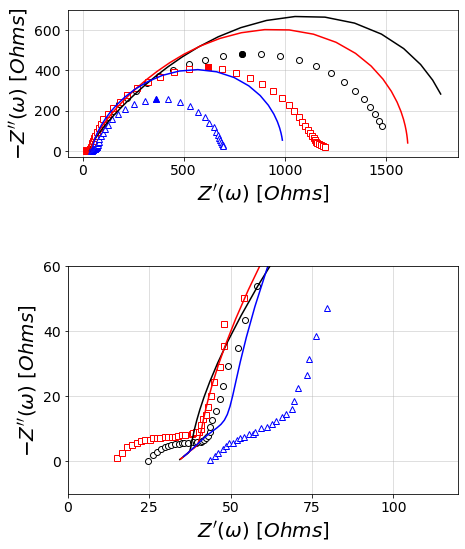

In [34]:
_, axes = plt.subplots(nrows=2, figsize=(7,10))
colors = [(0, 0, 0), (1, 0, 0), (0, 0, 1)]
markers = ['o', 's', '^']

for i, (f, Z) in enumerate(zip(fs_list, Zs_list)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[1], Z, c=colors[i], fmt=markers[i], mfc=(1,1,1))
    plot_nyquist(axes[0], Z_peak, c=colors[i], fmt=markers[i], units='\Omega')


for i, (f, Z) in enumerate(zip(fs_2D, Zgs_2D)):
    Z_peak = Z[np.argmin(Z.imag)]
    f_peak = f[np.argmin(f.imag)]
    plot_nyquist(axes[0], Z, c=colors[i], fmt='-')
    plot_nyquist(axes[1], Z, c=colors[i], fmt='-')

axes[0].set_ylim(-30, 700)
axes[1].set_xlim(0, 120)
axes[1].set_ylim(-10, 60)
plt.show()

In [28]:
for i, fs in enumerate(fs_list):
    fs_as_str = " ".join([str(f) for f in fs])
    fs_as_str = "f \"" + fs_as_str + "\""
    print(fs_as_str)
    np.savetxt(f"D:\COMSOL\PatternedFilm_Potentiodynamic\EIS_{10 ** i}%O2_frequencies.txt",
               [fs_as_str],
               fmt = '%s',
               delimiter='',
               newline=''
              )

f "59948.43 46415.89 35938.14 27825.59 21544.35 16681.01 12915.5 10000.0 7742.637 5994.842 4641.589 3593.814 2782.559 2154.435 1668.101 1291.55 1000.0 774.2637 599.4843 464.1589 359.3814 278.256 215.4435 166.8101 129.155 100.0 77.42637 59.94843 46.41589 35.93814 27.82559 21.54435 16.68101 12.9155 10.0 7.742637 5.994843 4.641589 3.593814 2.782559 2.154435 1.668101 1.29155 1.0 0.7742637 0.5994843 0.4641589 0.3593814 0.2782559 0.2154435 0.1668101 0.129155 0.1 0.07742637 0.05994843 0.04641589 0.03593814 0.02782559 0.02154435"
f "79432.82 63095.73 50118.72 39810.72 31622.78 25118.87 19952.62 15848.93 12589.25 10000.0 7943.282 6309.573 5011.873 3981.072 3162.278 2511.886 1995.262 1584.893 1258.925 1000.0 794.3282 630.9573 501.1872 398.1072 316.2278 251.1886 199.5262 158.4893 125.8925 100.0 79.43282 63.09573 50.11872 39.81072 31.62278 25.11886 19.95262 15.84893 12.58925 10.0 7.943282 6.309574 5.011872 3.981072 3.162278 2.511886 1.995262 1.584893 1.258925 1.0 0.7943282 0.6309574 0.5011872 0.39